In [7]:
import math
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [8]:
class AgentState(TypedDict):
    lives: int
    status: str

In [9]:
def router(state: AgentState) -> AgentState:
    print("I m in router")
    return state

In [10]:
def game_on(state: AgentState) -> AgentState:
    print("I m in game on node")
    state["status"] = "Game On"
    return state

In [21]:
def game_over(state: AgentState) -> AgentState:
    print("I m in game over node")
    state["status"] = "Game Over"
    return state

In [22]:
def decide(state: AgentState) -> str:
    if state["lives"] > 0:
        return "on"
    else:
        return "over"

In [23]:
graph = StateGraph(AgentState)
graph.add_node("router", router)
graph.add_node("game_on", game_on)
graph.add_node("game_over", game_over)

graph.set_entry_point("router")

graph.add_conditional_edges(
    "router",
    decide,
    {
        "on": "game_on",
        "over": "game_over"
    }
)

graph.set_finish_point("game_on")
graph.set_finish_point("game_over")

agent = graph.compile()

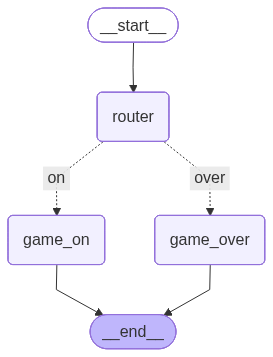

In [24]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [25]:
final_state = agent.invoke({"lives": 1})

I m in router
I m in game on node


In [26]:
print(final_state["status"])

Game On


In [27]:
final_state = agent.invoke({"lives": 0})

I m in router
I m in game over node


In [28]:
print(final_state["status"])

Game Over
